<a href="https://colab.research.google.com/github/kaispace30098/Inventory_planning_amazonVC_breakdown/blob/main/Amazon_Vendor_Central_Forecast_Breakdown_and_Inventory_Planning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

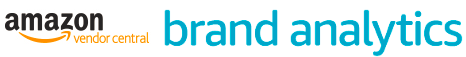


*This notebook breaks down Amazon Brand Analysis into per-product inventory, Open purchase order, and forecasts with customized summaries and product details to aid inventory planning.*

In [ ]:
#@title 🔼 1.Upload **Forecast and Inventory Planning_US.csv**
#import modules
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import io
from google.colab import files
import numpy as np
from datetime import datetime,timedelta



def read_dir_file(case_f):  # case_f = 0 for uploading one File and case_f = 1 for uploading one Zipped Directory
        #uploaded = files.upload()    # to upload a Full Directory, please Zip it first (use WinZip)
        for fn in uploaded.keys():
            name = fn  #.encode('utf-8')
            #print('\nfile after encode', name)
            #name = io.BytesIO(uploaded[name])
        if case_f == 0:    # case of uploading 'One File only'
            print('\n file name: ', name)
            return name
        else:   # case of uploading a directory and its subdirectories and files
            zfile = zipfile.ZipFile(name, 'r')   # unzip the directory 
            zfile.extractall()
            for d in zfile.namelist():   # d = directory
                print('\n main directory name: ', d)
                return d


#upload csv

uploaded = files.upload()
fileName = read_dir_file(0)
df0=pd.read_csv(io.BytesIO(uploaded[fileName]),encoding='utf-8')
date=df0.columns[8]

df1=pd.read_csv(io.BytesIO(uploaded[fileName]), encoding='utf-8',header=1)
df1=df1.iloc[:, 0:len(df1.columns)]
dft=df1.T
dict1={'GW22731' :  'B0777RJG6D','GW44800-O' :  'B07LBZGD97','GW22638' :  'B01LX9T6HF','GW22971' :  'B08WYQJ53B','GW44805' :  'B084HMJJ3B','GW22931' :  'B07V39R29T','GW22956' :  'B07ZWG619F','GW22735' :  'B0777THX2R','GWA0006' :  'B075RPXDWW','GW22955' :  'B081GJXXRM','GW22966' :  'B08YM8RKY4','GWA0005' :  'B075RJJXW8','GW22639' :  'B01M06ATV8','GWA0008' :  'B07H4S5VRC','GW22621' :  'B0106RV5JG','GWA0007' :  'B07DBNSCFW','GW22745' :  'B0777TC57D','GW22945' :  'B07ZTV8Y3T','GW22821-S' :  'B07FYXBHJ9','GW22954' :  'B0884M3H6W','GW22958' :  'B07ZQSP27V','GW22957' :  'B081G8PG9V','GW22921-S' :  'B07JP1GFNW','GW22746' :  'B0777TGG94','GWAC22005' :  'B079273Q9T','GWAC22003' :  'B0791T5JQQ','GW77723' :  'B07VBPDRDD','GW22976' :  'B08NRGH7C5','GWA0080' :  'B07JFQ416M','GW22640' :  'B01K8A4T5I','GW22965' :  'B08YLKH35X','GW77722' :  'B07VBPBWYP','GW44801' :  'B07J6QQGFH','GW22978' :  'B0961BM5CL','GW22974' :  'B08NQ6SCWC','GW66100' :  'B083LPBCFM','GW88000' :  'B07MZHD8BP','GW22826-S' :  'B07L5VM4BK','GW22967' :  'B08YMGX8JN','GW22977' :  'B08NR1W2BC','GW22964' :  'B08YLPJ2XN','GW44806' :  'B08YP6Y33X','GW22711' :  'B07YCVYBJQ','GW44804' :  'B07TKP7VLW','GW22661' :  'B078RTCRGM','GW22632' :  'B01EZAOHOA','GW22953' :  'B08P7Y9L8Y','GW22972' :  'B08WYPB7D3','GWAC22004' :  'B0791Z1DDX','GWAC22006' :  'B0791TTLTN','GW44803' :  'B07JB8RK8W','GW22651' :  'B07553KM1Q','GW22975' :  'B08NRW9J6V','GW22700' :  'B076HCR4FJ','GW22959' :  'B07YF5J36R','GW22633' :  'B01EZAOHOU','255084' :  'B086R7SQLP','GW22709' :  'B07VXYSWXB','GW44802' :  'B07T57PN9H','GW22979' :  'B0962833QX','GW88010' :  'B08RMRQNWP','GW22622' :  'B0106Q1DYY','GWA0011' :  'B08N1H98F5','GW88012' :  'B08RMSJ5TS','GW22708' :  'B07VWXV167','GW22611' :  'B00LOXNSUQ','GW22712' :  'B081QVH8KZ','GW22662' :  'B078RW3HHH','GW88011' :  'B08RNBC9SG','GW22932' :  'B08CHLPYL8','GW77726' :  'B07YCXT6LW','GW22637' :  'B01LVZY19H','GW22663' :  'B078X1C6ZT','GW22710' :  'B07JN9X4DH','GW22731' :  'B0777RJG6D','GW44805' :  'B084HMJJ3B','GW22637' :  'B01LVZY19H','GW22663' :  'B078X1C6ZT','GW22956' :  'B07ZWG619F','GW22931' :  'B07V39R29T','GW22961' :  'B08BX5DMZW','GW22652' :  'B0754QQDV7','GW22921-S' :  'B07JP1GFNW','GW22746' :  'B0777TGG94','GW22735' :  'B0777THX2R','GW22957' :  'B081G8PG9V','GW22638' :  'B01LX9T6HF','GW22975' :  'B08NRW9J6V','GW44800-O' :  'B07LBZGD97','GWAC22003' :  'B0791T5JQQ','GW22651' :  'B07553KM1Q','GW22745' :  'B0777TC57D','GWAC22006' :  'B0791TTLTN','GW77723' :  'B07VBPDRDD','GW22976' :  'B08NRGH7C5','GW22933' :  'B08BWYTGM4','GW22955' :  'B081GJXXRM','GW44804' :  'B07TKP7VLW','GW22954' :  'B0884M3H6W','GW88012' :  'B08RMSJ5TS','GW22945' :  'B07ZTV8Y3T','GW22503' :  'B07BF4KH96','GW22621' :  'B0106RV5JG','GW22966' :  'B08YM8RKY4','GWAC22004' :  'B0791Z1DDX','GW22977' :  'B08NR1W2BC','GW22965' :  'B08YLKH35X','GW22639' :  'B01M06ATV8','GW22964' :  'B08YLPJ2XN','GW22974' :  'B08NQ6SCWC','GW66100' :  'B083LPBCFM','GW22958' :  'B07ZQSP27V','GW22953' :  'B08P7Y9L8Y','GW22932' :  'B08CHLPYL8','GW22700' :  'B076HCR4FJ','GW77722' :  'B07VBPBWYP','GW22632' :  'B01EZAOHOA','GW22979' :  'B0962833QX','GW22972' :  'B08WYPB7D3','GW22978' :  'B0961BM5CL','GW22971' :  'B08WYQJ53B','GW88011' :  'B08RNBC9SG','GW88010' :  'B08RMRQNWP','GW22826-S' :  'B07L5VM4BK','GW22633' :  'B01EZAOHOU','GW44806' :  'B08YP6Y33X','GW22640' :  'B01K8A4T5I','GW44802' :  'B07T57PN9H','GWAC22005' :  'B079273Q9T','GW22967' :  'B08YMGX8JN','GWA0011' :  'B08N1H98F5','255084' :  'B086R7SQLP','GW22712' :  'B081QVH8KZ','GW22959' :  'B07YF5J36R','GW77726' :  'B07YCXT6LW','GW22711' :  'B07YCVYBJQ','GW22709' :  'B07VXYSWXB','GW22708' :  'B07VWXV167','GWA0009' :  'B07VKGTHB9','GWAC982' :  'B07TWN9PCF','GWAC983' :  'B07TTJXMJQ','GWAC981' :  'B07SVGNNXR','GW88000' :  'B07MZHD8BP','GW22710' :  'B07JN9X4DH','GWA0080' :  'B07JFQ416M','GW44803' :  'B07JB8RK8W','GW44801' :  'B07J6QQGFH','GWA0008' :  'B07H4S5VRC','GW22821-S' :  'B07FYXBHJ9','GWA0007' :  'B07DBNSCFW','GW22502' :  'B07BKP3PYX','GW22664' :  'B078X1SZHQ','GW22662' :  'B078RW3HHH','GW22661' :  'B078RTCRGM','GW22704' :  'B076TR9QTM','GW22703' :  'B076HFR3LQ','GWA0006' :  'B075RPXDWW','GWA0005' :  'B075RJJXW8','GW22653' :  'B0754ZJ3SW','GW22654 ' :  'B0754K9P43','GW22636' :  'B01LWCOMIF','GW22634' :  'B01EZAOHO0','GW22638' :  'B013TBYQ5Q','GW22622' :  'B0106Q1DYY','GW22620' :  'B00VXXT5EU','GW22611' :  'B00LOXNSUQ','GW21930' :  'B00FRS8MD2','GW22025' :  'B00CZPF5L2','GW22638' :  'B01LX9T6HF','8080109' : 'B01A0N0ROA', '9090137' : 'B00VMQ5JDY', '9090136' : 'B00VMP3T50', 'SL1205-BURG' : 'B002YI98GI', 'TO8187' : 'B00YVMGZXY', 'SL1215' : 'B001CJG02A', 'SL1214' : 'B00D8DSRHO', 'SL1205-BROWN' : 'B002YIK7I6', 'SL1205-BK' : 'B000SZUMQY', 'SL1204-Green' : 'B001BNZAPA', 'SL1204-BROWN' : 'B0083WO48Q', 'SL1204-BLUE' : 'B001BO1PNK', 'SL1204-BK/FLAG' : 'B001BNU2Q2', 'SD8187' : 'B01N07V3GQ', 'SD8185' : 'B01N8UKE6X', 'SD8181' : 'B06ZYMXQ5G', 'SD8117' : 'B01MRIQURT', 'SD8115' : 'B01N03R7KX', 'SD8111' : 'B01N8QGWE4', 'RH8187' : 'B01577JE7U', 'RH8181' : 'B017WJ1EF6', 'RH8117' : 'B01578ANH4', 'RH8111' : 'B017WJXD8M', 'RF6091' : 'B0049IRI8Q', 'RD5' : 'B004LF6Z0O', 'RD4' : 'B004LF8YZI', 'RD3' : 'B004LF54X8', 'RD1' : 'B0044GF0J2', 'RC7' : 'B006R7PHI0', 'RC4' : 'B0044G9M2S', 'RC3' : 'B0044G0G9Q', 'RC1' : 'B0044FCIHU', 'RA811WL' : 'B08X9MNH36', 'RA7' : 'B006OQJLD6', 'RA5' : 'B002BFVOCA', 'RA4' : 'B00C59IYNE', 'RA3' : 'B002BFXMFM', 'RA1' : 'B002BFJ3YG', 'PS2001' : 'B08MLJ9J9C', 'PS1009' : 'B08MKT8KPL', 'PS1008' : 'B08MKZPD66', 'PS1007' : 'B08MLBNCTK', 'PS1006-NP' : 'B076KP71SJ', 'PS1005-NP' : 'B01COA0UTE', 'PS1004-NP' : 'B0131PZ9J2', 'PS1003-NP' : 'B0131NFWX2', 'PS1002-NP' : 'B0131L8NLM', 'PS1001-NP' : 'B0131GJ5X2', 'PE1' : 'B011PWTWNM', 'PA1' : 'B00V94KSOO', 'LRVH8187' : 'B0956M5NG3', 'LRVH8117' : 'B0956MRTHT', 'LRVH8111' : 'B08XBD3H8B', 'L158181WL' : 'B0956FF2YB', 'L158111WL' : 'B0956DDJWD', 'L118187WL' : 'B09565W16K', 'L118117WL' : 'B08XB5BGMJ', 'HC8117' : 'B01N8UK4QR', 'HC8114' : 'B01N3YYLQJ', 'HC1' : 'B001B60S72', 'HB1' : 'B001B66AL0', 'GH8187' : 'B017WH3K78', 'GH8181' : 'B0158ZVPP0', 'GH8117' : 'B01578S5WY', 'GH8111' : 'B00YSZKNP0', 'GC7' : 'B001AZJNJS', 'GC5' : 'B006RA2JFG', 'GC1' : 'B001AZLBAW', 'GB7' : 'B001AYN408', 'GB5' : 'B006RA0I36', 'GB3' : 'B001AYPEVU', 'GB1' : 'B001AYS61K', 'GA5' : 'B006R9W68W', 'GA3' : 'B001AYMLOS', 'GA1' : 'B001AWVP74', 'DA1' : 'B001AZUXGU', 'BP8117' : 'B015DBIYUS', '25012V' : 'B01BDWJTR8', '25011V' : 'B01BDWKCRO', '25010V' : 'B01BDWK3EG', '25009V' : 'B01BDWJ9NM', '25008V' : 'B01BDWIQE0', '15004V' : 'B01BDWIM3U', '278107' : 'B08GGDD562', '278104' : 'B08GH27P5S', '278103' : 'B08GGF5KF4', '276097' : 'B086TXR136', '276094' : 'B086V6BHT4', '276093' : 'B086V3778S', '275087' : 'B086V3BNNV', '275084' : 'B086V2CV77', '275083' : 'B086TTG38G', '274067' : 'B086TY9G9Q', '274064' : 'B086V951HS', '274063' : 'B086V764T8', '258107' : 'B08GGD7HMK', '258106' : 'B08GGGS9CL', '258105' : 'B08GGCTZNT', '258104' : 'B08GG9L73B', '258103' : 'B08GGCW9YQ', '258101' : 'B08GGCJMSH', '256097' : 'B086R8JZHF', '256094' : 'B086R7Q5C9', '256091' : 'B086R8H4DP', '255089' : 'B086R8ZPSB', '255087' : 'B086R91FHW', '255086' : 'B086R6V2V7', '255085' : 'B086RB6C7G', '255083' : 'B086R7WZMG', '255081' : 'B086GBQTZ1', '229127' : 'B014RY3EOI', '229124' : 'B00V94W7UW', '226097' : 'B012P5QP2Y', '226094' : 'B00V94ZE84', '219187' : 'B00FBQ440K', '219181' : 'B00FBQ2OKM', '219127' : 'B00FBQ0NGO', '219121' : 'B00FBPYECY', '209187' : 'B00FBPWO0S', '209181' : 'B00FBPQK7Q', '209127' : 'B00FBPOXZ2', '209121' : 'B00FBPM5WK', '199127' : 'B00BZ71U5Q', '159187' : 'B0042ZIT7U', '159185' : 'B0042UAHGQ', '159183' : 'B0042U4YFQ', '159181' : 'B0083LIKU0', '159127' : 'B0042ZPA9U', '159125' : 'B003QU5PY2', '159123' : 'B003QU3HW4', '159121' : 'B0083LHN7Q', '129127' : 'B003QTGL00', '119187' : 'B0042Z0E6E', '119185' : 'B0042YYK9W', '119183' : 'B0042Z307E', '119127' : 'B0043063JU', '119125' : 'B004304C0W', '119123' : 'B004303ZGY', '116097' : 'B004306VTC', '116095' : 'B004308V7M', '116093' : 'B004303BNQ', '36031' : 'B01CKLUTJ8', '36030' : 'B01CKHPMYY', '36029' : 'B01CKHJ934', '36028' : 'B01CKGB35W'}
def get_key(my_dict,val):
    for key, value in my_dict.items():
         if val == value:
             return key
 
    return "There is no such Key"
dft.columns=dft.iloc[0]
dft=dft.iloc[1:]
dft=dft.reset_index(drop=True)



In [ ]:
#@title 🔼 2.Upload **Inventory Health_US.csv**
uploaded = files.upload()
fileName = read_dir_file(0)
df2=pd.read_csv(io.BytesIO(uploaded[fileName]), encoding='utf-8',header=1)
df2t=df2.T
df2t.columns=df2t.iloc[0]
df2t=df2t.iloc[1:]
df2t.head()

df2t.iloc[4]=df2t.iloc[4].replace('[\,]', '', regex=True).astype(float)  #Convert currency "," to float.
df2t.iloc[7]=df2t.iloc[7].replace('[\,]', '', regex=True).astype(float)  #Convert currency "," to float.


In [ ]:
#@title 🔎 3.**Risky items being out of stock**
#column 0 : asin
#column 8 : available inventory
#column 11: open purchase order
#column 16~ 28  past sales
#column 29~ 54  mean forecast
#column 55~ 80  P70 forecast
#column 81-106  P80 forecast
#column 107~132 P90 forecast

#Variable1: pick a forecast method
Forecast_Method='P90'#@param ["Mean", "P70", "P80","P90"]
week1=0
if Forecast_Method=='Mean':
  week1=29
elif Forecast_Method=="P70":
  week1=55
elif Forecast_Method=="P80":
  week1=81
else:
  week1=107
#Variable2: # of weeks later (shows item will be OOS)
After_Week=10 #@param {type:"number"}
#Variable3: available inventory should add open purchase order or not
Inventory_With_Open_POs_On_The_Way=True #@param {type:"boolean"}

#make_choice1 = st.sidebar.selectbox('Forecast:',['Mean','P70','P80','P90'])
#make_choice1 = st.sidebar.selectbox('Forecast:',['Mean','P70','P80','P90'])
#make_choice1 = st.sidebar.selectbox('Forecast:',['Mean','P70','P80','P90'])

candidatelist=[]
OOSqty=[]
df1['Available Inventory']=df1['Available Inventory'].replace('[\,]', '', regex=True).astype(float)
df1['Open Purchase Order Quantity']=df1['Open Purchase Order Quantity'].replace('[\,]', '', regex=True).astype(float)
df1.iloc[:,16:132]=df1.iloc[:,16:132].replace('[\,]', '', regex=True).astype(float)

for i in range(0,len(df1)):
  if Inventory_With_Open_POs_On_The_Way==True:
  
    if df1.iloc[i][8]+df1.iloc[i][11]-np.sum(df1.iloc[i][week1:week1+After_Week]) < 0:
      #candidatelist.append((get_key(dict1,df1.iloc[i][0]),df1.iloc[i][8]+df1.iloc[i][11]-np.sum(df1.iloc[i][week1:week1+Week])))
        candidatelist.append(get_key(dict1,df1.iloc[i][0]))
        OOSqty.append(np.sum(df1.iloc[i][week1:week1+After_Week])-df1.iloc[i][8]-df1.iloc[i][11])
     
  else:

    if df1.iloc[i][8]-np.sum(df1.iloc[i][week1:week1+After_Week]) < 0:
      #candidatelist.append((get_key(dict1,df1.iloc[i][0]),df1.iloc[i][8]-np.sum(df1.iloc[i][week1:week1+Week])))
        candidatelist.append(get_key(dict1,df1.iloc[i][0]))
        OOSqty.append(np.sum(df1.iloc[i][week1:week1+After_Week])-df1.iloc[i][8])
    

dfshow=pd.DataFrame({'Risky_item':candidatelist,'Out_of_Stock_Quantity':OOSqty})
dfshow=dfshow.sort_values(by=['Out_of_Stock_Quantity'],ascending=False)
print(f'{After_Week} weeks later the, there will be out-of-stock items ')
pd.set_option('display.max_rows', None)
dfshow

In [ ]:
#@title 🔎 3. **Item Details**
try:
  SKU = "SD8187" #@param {type:"string"}
  currentdate=date.split()[2].split(']')[0]
  date_time_obj = datetime.strptime(currentdate, '%m/%d/%y')

  import matplotlib.pyplot as plt
  from importlib import reload
  plt=reload(plt)
  datelist=[]
  for i in range(0,14):
    d=date_time_obj-timedelta(days=7*i)
  
    datelist.append(d.date().isoformat())
  for i in range(1,27):
    d=date_time_obj+timedelta(days=7*i)
    datelist.append(d.date().isoformat())

  dfsku=pd.DataFrame()
  dfsku['date']=datelist
  dfsku=dfsku.sort_values(by=['date'])
  dfsku=dfsku.reset_index(drop=True)


  dft[15:132]=dft[15:132].replace('[\,]', '', regex=True).astype(float)  #Convert currency "," to float.

  rowIndex=dft.index[0:13]

  dfsku.loc[rowIndex, 'pastsales'] =[*dft[dict1[SKU]].iloc[15:28]]

  rowIndex=dft.index[14:40]

  dfsku.loc[rowIndex, 'mean forecast'] =[*dft[dict1[SKU]].iloc[28:54]]
  dfsku.loc[rowIndex, 'P70 forecast'] =[*dft[dict1[SKU]].iloc[54:80]]
  dfsku.loc[rowIndex, 'P80 forecast'] =[*dft[dict1[SKU]].iloc[80:106]]
  dfsku.loc[rowIndex, 'P90 forecast'] =[*dft[dict1[SKU]].iloc[106:132]]

  dfsku=dfsku.set_index('date')

  print('The sales past 13 weeks and 26-week forecast...')
  from matplotlib.pyplot import figure

  figure(figsize=(20, 8))

  plt.plot(dfsku)
  plt.xticks(rotation=90)
  plt.legend(dfsku,loc='upper left')
  plt.axvline(x=12,color='black',linestyle='--')
  plt.axvline(x=14,color='black',linestyle='--')

  plt.title(SKU);

  plt.show()

  dfdrop=dfsku.copy()[14:len(dfsku)]
  dfdrop=dfdrop.drop(columns=['pastsales'])
  dfdrop=dfdrop.astype('float')
except Exception:
    print("There is no such SKU, or no spaces allowed in your text string")
#######################################################################################################
try:
  inv=df2t[dict1[SKU]].iloc[7]

  dfdrop.iloc[0]=inv-dfdrop.iloc[0]
  for i in range(1,len(dfdrop)):
    dfdrop.iloc[i]=dfdrop.iloc[i-1]-dfdrop.iloc[i]
  print('===================================================================')
  print('Inventory level is:', inv)
  listmean=[]
  listp70=[]
  listp80=[]
  listp90=[]


  for i in range(0,len(dfdrop)):
    if(dfdrop['mean forecast'].iloc[i]<0):
      listmean.append(i)
  
    if(dfdrop['P70 forecast'].iloc[i]<0):
     
      listp70.append(i)

    if(dfdrop['P80 forecast'].iloc[i]<0):
     
      listp80.append(i)

    if(dfdrop['P90 forecast'].iloc[i]<0):
     
      listp90.append(i)



  from matplotlib.pyplot import figure

  figure(figsize=(20, 8))

  plt.plot(dfdrop)
  plt.xticks(rotation=90)
  plt.legend(dfdrop,loc='lower left')
  plt.axhline(y=0,color='black')
  if len(listp90)>0:
    plt.axvline(x=listp90[0]-1,color='black',linestyle='--')
    print('Out-of-Stock Date from P90-forecast',dfdrop.index[listp90[0]-1] if listp90[0]>0 else f'before {dfdrop.index[listp90[0]]}' )
  if len(listp80)>0:
    plt.axvline(x=listp80[0]-1,color='black',linestyle='--')
    print('Out-of-Stock Date from P80-forecast',dfdrop.index[listp80[0]-1] if listp80[0]>0 else f'before {dfdrop.index[listp80[0]]}')
  if len(listp70)>0:
    plt.axvline(x=listp70[0]-1,color='black',linestyle='--')
    print('Out-of-Stock Date from P70-forecast',dfdrop.index[listp70[0]-1] if listp70[0]>0 else f'before {dfdrop.index[listp70[0]]}' )
  if len(listmean)>0:
    plt.axvline(x=listmean[0]-1,color='black',linestyle='--')
    print('Out-of-Stock Date from mean-forecast',dfdrop.index[listmean[0]-1] if listmean[0]>0 else f'before {dfdrop.index[listmean[0]]}' )
  
  plt.title(SKU);
  plt.show()
except Exception:
    pass
#####################################################################################################
try:
  opo=df2t[dict1[SKU]].iloc[4]

  dfdrop1=dfsku.copy()[14:len(dfsku)]
  dfdrop1=dfdrop1.drop(columns=['pastsales'])
  dfdrop1=dfdrop1.astype('float')

  invandopo=inv+opo
  dfdrop1.iloc[0]=invandopo-dfdrop1.iloc[0]
  for i in range(1,len(dfdrop1)):
    dfdrop1.iloc[i]=dfdrop1.iloc[i-1]-dfdrop1.iloc[i]
  print('===================================================================')
  print('With Open POs received, Inventory level will be:', inv+opo)
  listmean=[]
  listp70=[]
  listp80=[]
  listp90=[]

  for i in range(0,len(dfdrop1)):
    if(dfdrop1['mean forecast'].iloc[i]<0):
      listmean.append(i)
  
    if(dfdrop1['P70 forecast'].iloc[i]<0):
     
      listp70.append(i)

    if(dfdrop1['P80 forecast'].iloc[i]<0):
     
      listp80.append(i)

    if(dfdrop1['P90 forecast'].iloc[i]<0):
     
      listp90.append(i)



  from matplotlib.pyplot import figure

  figure(figsize=(20, 8))

  plt.plot(dfdrop1)
  plt.xticks(rotation=90)
  plt.legend(dfdrop1,loc='lower left')
  plt.axhline(y=0,color='black')

  if len(listp90)>0:
    plt.axvline(x=listp90[0]-1,color='black',linestyle='--')
    print('Out-of-Stock Date from P90-forecast',dfdrop1.index[listp90[0]-1] if listp90[0]>0 else f'before {dfdrop1.index[listp90[0]]}' )
  if len(listp80)>0:
    plt.axvline(x=listp80[0]-1,color='black',linestyle='--')
    print('Out-of-Stock Date from P80-forecast',dfdrop1.index[listp80[0]-1] if listp80[0]>0 else f'before {dfdrop1.index[listp80[0]]}' )
  if len(listp70)>0:
    plt.axvline(x=listp70[0]-1,color='black',linestyle='--')
    print('Out-of-Stock Date from P70-forecast',dfdrop1.index[listp70[0]-1] if listp70[0]>0 else f'before {dfdrop1.index[listp70[0]]}' )
  if len(listmean)>0:
    plt.axvline(x=listmean[0]-1,color='black',linestyle='--')
    print('Out-of-Stock Date from mean-forecast',dfdrop1.index[listmean[0]-1] if listmean[0]>0 else f'before {dfdrop1.index[listmean[0]]}' )
  
  plt.title(SKU);
  plt.show()
except Exception:
    pass